In [18]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

In [19]:
training_df=pd.read_csv("./train.csv")
test_df=pd.read_csv("./test.csv")

In [20]:
training_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


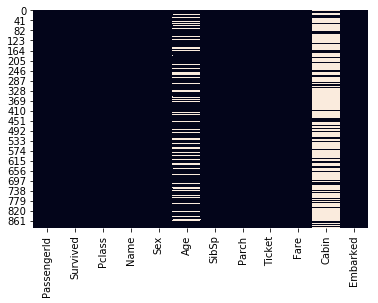

In [22]:
sb.heatmap(training_df.isnull(),cbar=False)

In [23]:
training_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
training_df.isnull().sum()/len(training_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [25]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
training_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rood, Mr. Hugh Roscoe",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [27]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Samaan, Mr. Hanna",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [28]:
training_df['CabReplace'] = training_df.Cabin.str.extract('([A-Z]+)', expand=False)
test_df['CabReplace'] = test_df.Cabin.str.extract('([A-Z]+)', expand=False)
pd.crosstab(training_df['CabReplace'], training_df['Sex'])

Sex,female,male
CabReplace,,
A,1,14
B,27,20
C,27,32
D,18,15
E,15,17
F,5,8
G,4,0
T,0,1


In [29]:
training_df.CabReplace.replace(to_replace =["A", "B","C",'D','E','F','G','T'],value =[0,1,2,3,4,5,6,7],inplace=True)
test_df.CabReplace.replace(to_replace =["A", "B","C",'D','E','F','G','T'],value =[0,1,2,3,4,5,6,7],inplace=True)
training_df.fillna({'CabReplace':8},inplace=True)
test_df.fillna({'CabReplace':8},inplace=True)

In [30]:
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabReplace
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,8.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,8.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,2.0


In [32]:
training_df.fillna({'Embarked':'S'},inplace=True)
training_df.replace(to_replace =["S", "Q","C"],value =[0,1,2],inplace=True)
test_df.replace(to_replace =["S","Q", "C"],value =[0,1,2],inplace=True)

In [33]:
#training_df['Cabin_yn']=np.where(training_df['Cabin'].isnull(),0,1)
#test_df['Cabin_yn']=np.where(test_df['Cabin'].isnull(),0,1)
training_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)
training_df.drop('Ticket',axis=1,inplace=True)
test_df.drop('Ticket',axis=1,inplace=True)

In [34]:
training_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabReplace
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,8.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,0,8.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,0,8.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,2,2.0


/home/ommim/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


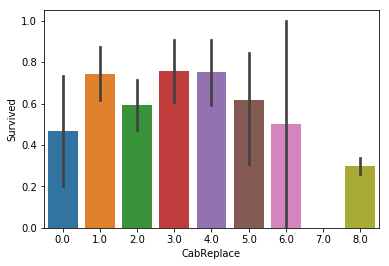

In [36]:
sb.barplot(x="CabReplace", y="Survived", data=training_df)

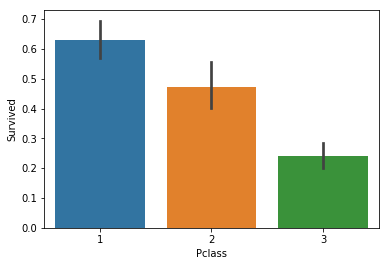

In [37]:
sb.barplot(x="Pclass", y="Survived", data=training_df)

In [39]:
#sb.barplot(x="Pclass", y="Cabin_yn", data=training_df)

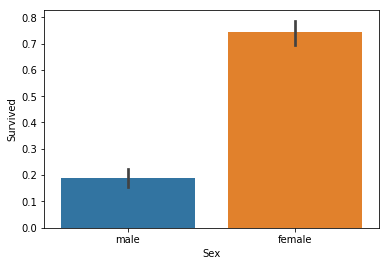

In [40]:
sb.barplot(x="Sex", y="Survived", data=training_df)

In [41]:
training_df[training_df['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabReplace
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,2,8.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,2,1.0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,2,1.0


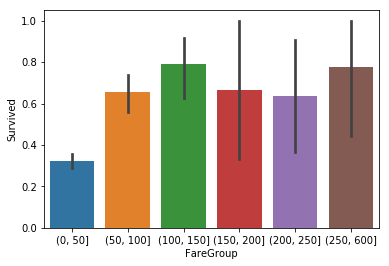

In [42]:
bins=list(range(0,300,50))+[600]
training_df['FareGroup'] = pd.cut(training_df["Fare"], bins)
sb.barplot(x="FareGroup", y="Survived", data=training_df)

In [43]:
meanFare=training_df[['Fare']].mean()+test_df[['Fare']].mean()
test_df.fillna({'Fare':meanFare},inplace=True)
training_df.drop('FareGroup',axis=1,inplace=True)

In [44]:
training_df.replace(to_replace =["female", "male"],value =[0,1],inplace=True)
test_df.replace(to_replace =["female", "male"],value =[0,1],inplace=True)

In [45]:
temp=training_df.append(test_df,sort=False)

In [46]:
temp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabReplace
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,8.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,8.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,2.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,8.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,2,2.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,8.0
416,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,8.0


In [47]:
temp['Title'] = temp.Name.str.extract(', ([A-Za-z]+)\.', expand=False)
training_df['Title'] = training_df.Name.str.extract(', ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(', ([A-Za-z]+)\.', expand=False)
pd.crosstab(temp['Title'], temp['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [48]:
means=[]

mask_Mr=(temp['Title']!='Master') & (temp['Sex']==1)
mask_Mrs=((temp['Title']!='Miss') | ((temp['Parch']==0) & (temp['SibSp']==0))) & (temp['Sex']==0)
mask_Master=(temp['Title']=='Master')& (temp['Sex']==1)
mask_Miss=(temp['Title']=='Miss') & ((temp['Parch']!=0) & (temp['SibSp']!=0))

for mask in [mask_Mr, mask_Master, mask_Mrs, mask_Miss]:
    means.append(temp[mask][['Age']].mean().values[0])


In [49]:
for df in [training_df, test_df]:
    mask_Mr=(df['Age'].isnull()) & (df['Title']!='Master') & (df['Sex']==1)
    mask_Mrs=(df['Age'].isnull()) & ((df['Title']!='Miss') | ((df['Parch']==0) & (df['SibSp']==0))) & (df['Sex']==0)
    mask_Master=(df['Age'].isnull()) & (df['Title']=='Master') & (df['Sex']==1)
    mask_Miss=(df['Age'].isnull()) & (df['Title']=='Miss') & ((df['Parch']!=0) & (df['SibSp']!=0))
    masks=[mask_Mr, mask_Master, mask_Mrs, mask_Miss]
    for mask_mean in zip(masks,means):
        df.loc[mask_mean[0],'Age']=mask_mean[1]
    df.loc[(df['Age'].isnull()),'Age']=means[2]

In [50]:
training_df.drop(['PassengerId','Name','Title'],axis=1,inplace=True)
ids=test_df['PassengerId']
test_df.drop(['PassengerId','Name','Title'],axis=1,inplace=True)

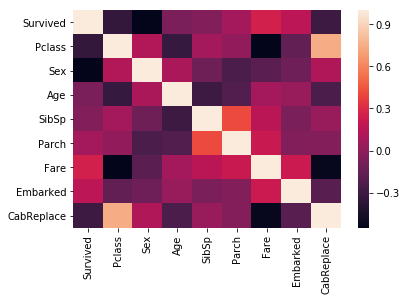

In [51]:
sb.heatmap(training_df.corr())

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = training_df.drop('Survived', axis=1)
target = training_df["Survived"]
x_train, x_cval, y_train, y_cval = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [53]:
acc_train=[]
acc_cval=[]
from sklearn.linear_model import LogisticRegression
for c in np.arange(0.05,2,0.05):
    logreg = LogisticRegression(penalty='l2',C=c, solver='lbfgs', max_iter=500)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_train)
    acc_train.append(accuracy_score(y_pred, y_train) * 100)
    y_pred = logreg.predict(x_cval)
    acc_cval.append(accuracy_score(y_pred,y_cval)*100)

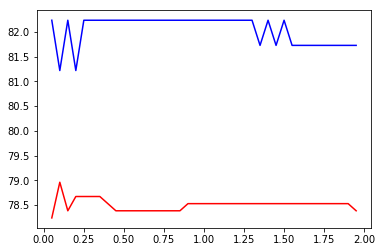

In [54]:
plt.plot(np.arange(0.05,2,0.05),np.array(acc_train),color='r')
plt.plot(np.arange(0.05,2,0.05),np.array(acc_cval),color='b')

plt.show()

In [55]:
logreg = LogisticRegression(penalty='l2',C=0.3, solver='lbfgs', max_iter=500)
logreg.fit(x_train, y_train)
acc=(accuracy_score(y_pred,y_cval)*100)

In [56]:
acc

81.7258883248731

In [57]:
acc_train=[]
acc_cval=[]
from sklearn.svm import SVC
for c in np.arange(0.05,5,0.05):
    svm = SVC(C=c,gamma='auto')
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_train)
    acc_train.append(accuracy_score(y_pred, y_train) * 100)
    y_pred = svm.predict(x_cval)
    acc_cval.append(accuracy_score(y_pred,y_cval)*100)

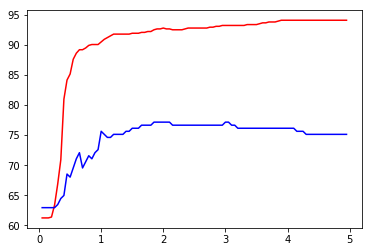

In [58]:
plt.plot(np.arange(0.05,5,0.05),np.array(acc_train),color='r')
plt.plot(np.arange(0.05,5,0.05),np.array(acc_cval),color='b')

plt.show()

In [59]:
m=max(acc_cval)
[i for i, j in enumerate(acc_cval) if j == m]
temp=np.arange(0.05,5,0.05)

In [60]:
svm = SVC(C=1.45,gamma='auto')
svm.fit(x_train, y_train)

SVC(C=1.45, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
test_df.loc[test_df.Fare.isnull(),'Fare']=test_df[(test_df['Pclass']==3) & (test_df['Sex']==1)][['Fare']].mean().values[0]

In [62]:
predictions=logreg.predict(test_df)

In [63]:
predictions_df=pd.DataFrame({'PassengerId':ids,'Survived':predictions})
predictions_df.to_csv('submission.csv', index=False)